<a href="https://colab.research.google.com/github/divsal009/div/blob/master/functional_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

In [29]:
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_28 (InputLayer)           [(None, 784)]        0                                            
__________________________________________________________________________________________________
model_20 (Functional)           (None, 32)           332936      input_28[0][0]                   
__________________________________________________________________________________________________
model_21 (Functional)           (None, 32)           332936      input_28[0][0]                   
__________________________________________________________________________________________________
model_22 (Functional)           (None, 32)           332936      input_28[0][0]                   
___________________________________________________________________________________________

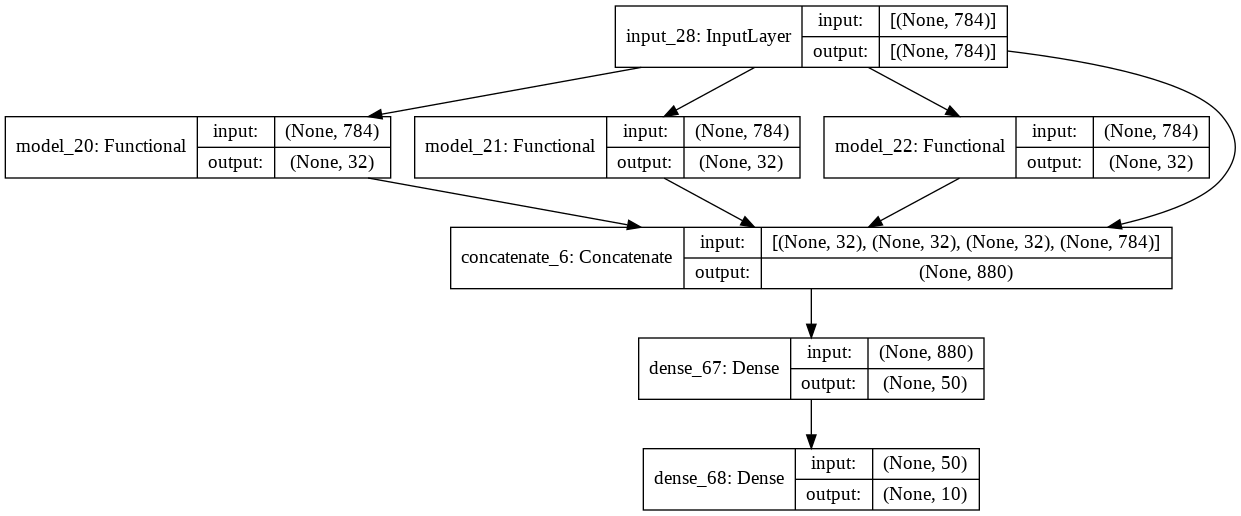

In [30]:
def get_model():
    inputs = keras.Input(shape=(784,))
    x = layers.Dense(360)(inputs)
    x = layers.Dense(128)(x)
    outputs = layers.Dense(32)(x)
    return keras.Model(inputs, outputs)


model1 = get_model()
model2 = get_model()
model3 = get_model()

inputs = keras.Input(shape=(784,))
y1 = model1(inputs)
y2 = model2(inputs)
y3 = model3(inputs)
y = layers.concatenate([y1, y2, y3,inputs])
y=layers.Dense(50)(y)
outputs = layers.Dense(10)(y)
ensemble_model = keras.Model(inputs=inputs, outputs=outputs)
ensemble_model.summary()
keras.utils.plot_model(ensemble_model, "my_first_model_with_shape_info.png", show_shapes=True)

In [31]:

ensemble_model.compile(optimizer="adam", loss="categorical_crossentropy",metrics=["accuracy"])

history = ensemble_model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.2)

test_scores = ensemble_model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Epoch 1/10
750/750 [==============================] - 10s 13ms/step - loss: 9.0380 - accuracy: 0.1283 - val_loss: 9.6588 - val_accuracy: 0.1144
Epoch 2/10
750/750 [==============================] - 10s 13ms/step - loss: 9.6423 - accuracy: 0.1151 - val_loss: 9.6588 - val_accuracy: 0.1127
Epoch 3/10
750/750 [==============================] - 10s 13ms/step - loss: 9.6369 - accuracy: 0.1143 - val_loss: 9.6588 - val_accuracy: 0.1127
Epoch 4/10
750/750 [==============================] - 10s 13ms/step - loss: 9.6369 - accuracy: 0.1143 - val_loss: 9.6588 - val_accuracy: 0.1127
Epoch 5/10
750/750 [==============================] - 9s 13ms/step - loss: 9.6369 - accuracy: 0.1143 - val_loss: 9.6588 - val_accuracy: 0.1127
Epoch 6/10
750/750 [==============================] - 9s 13ms/step - loss: 9.6369 - accuracy: 0.1143 - val_loss: 9.6588 - val_accuracy: 0.1127
Epoch 7/10
750/750 [==============================] - 10s 13ms/step - loss: 9.6369 - accuracy: 0.1143 - val_loss: 9.6588 - val_accuracy: 0